In [706]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [707]:
df = pd.read_csv('Seasons_Stats.csv')
df = df[df['Year'] >= 1980].iloc[:,1:]    # Only choosing data since year 1980 because of the draft pick dataset
df.reset_index(inplace = True)
df.drop(columns = ['index'], inplace = True)
df.head(3)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0


In [708]:
col_percent = []
for col in df.columns:
  if '%' in col:
    col_percent.append(col)
# Getting rid of all the percentage variables so we are only left with varibales that can be summed up
df.drop(columns = col_percent, inplace = True)
df.drop(columns = ['blanl', 'blank2'], inplace = True)
df.fillna(0, inplace = True)
df.head(3)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,3PAr,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,0.0,3143.0,25.3,0.001,...,476.0,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,0.0,1222.0,11.0,0.003,...,82.0,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,1980.0,Alvan Adams,C,25.0,PHO,75.0,0.0,2168.0,19.2,0.002,...,236.0,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0


In [709]:
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', '3PAr',
       'FTr', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG',
       'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [710]:
cols_sum = ['Player', 'MP', 'WS', 'BPM', 'FG', '3P', '2P', 'FT', 'TRB', 'AST', 'STL', 'BLK', 'PTS']
df = df.loc[:, cols_sum].groupby('Player').sum().reset_index()
df

,Player,MP,WS,BPM,FG,3P,2P,FT,TRB,AST,STL,BLK,PTS
0,A.C. Green,39044.0,104.2,-1.5,4778.0,125.0,4653.0,3247.0,10129.0,1469.0,1103.0,562.0,12928.0
1,A.J. Bramlett,61.0,-0.2,-16.8,4.0,0.0,4.0,0.0,22.0,0.0,1.0,0.0,8.0
2,A.J. English,3108.0,1.1,-10.2,617.0,9.0,608.0,259.0,315.0,320.0,57.0,24.0,1502.0
3,A.J. Guyton,1246.0,0.3,-33.0,166.0,73.0,93.0,37.0,80.0,147.0,20.0,12.0,442.0
4,A.J. Hammons,163.0,0.0,-5.6,17.0,5.0,12.0,9.0,36.0,4.0,1.0,13.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,Zeljko Rebraca,3553.0,8.7,-24.4,522.0,0.0,522.0,323.0,746.0,94.0,62.0,171.0,1367.0
2831,Zendon Hamilton,1609.0,3.2,-71.6,183.0,0.0,183.0,245.0,475.0,33.0,43.0,28.0,611.0
2832,Zoran Dragic,150.0,-0.1,-20.1,22.0,6.0,16.0,6.0,16.0,10.0,4.0,0.0,56.0
2833,Zoran Planinic,1584.0,1.6,-12.4,197.0,37.0,160.0,130.0,198.0,165.0,58.0,7.0,561.0


In [711]:
df = df[df['MP'] > 0].reset_index()
df = df.iloc[:, 1:]
df

,Player,MP,WS,BPM,FG,3P,2P,FT,TRB,AST,STL,BLK,PTS
0,A.C. Green,39044.0,104.2,-1.5,4778.0,125.0,4653.0,3247.0,10129.0,1469.0,1103.0,562.0,12928.0
1,A.J. Bramlett,61.0,-0.2,-16.8,4.0,0.0,4.0,0.0,22.0,0.0,1.0,0.0,8.0
2,A.J. English,3108.0,1.1,-10.2,617.0,9.0,608.0,259.0,315.0,320.0,57.0,24.0,1502.0
3,A.J. Guyton,1246.0,0.3,-33.0,166.0,73.0,93.0,37.0,80.0,147.0,20.0,12.0,442.0
4,A.J. Hammons,163.0,0.0,-5.6,17.0,5.0,12.0,9.0,36.0,4.0,1.0,13.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,Zeljko Rebraca,3553.0,8.7,-24.4,522.0,0.0,522.0,323.0,746.0,94.0,62.0,171.0,1367.0
2829,Zendon Hamilton,1609.0,3.2,-71.6,183.0,0.0,183.0,245.0,475.0,33.0,43.0,28.0,611.0
2830,Zoran Dragic,150.0,-0.1,-20.1,22.0,6.0,16.0,6.0,16.0,10.0,4.0,0.0,56.0
2831,Zoran Planinic,1584.0,1.6,-12.4,197.0,37.0,160.0,130.0,198.0,165.0,58.0,7.0,561.0


In [712]:
for col in df.iloc[:, 2:].columns:
  df[col + ' per min'] = df[col] / df['MP']

df.fillna(0, inplace = True)

In [713]:
df_num = df.iloc[:, 13:]
df_num

,WS per min,BPM per min,FG per min,3P per min,2P per min,FT per min,TRB per min,AST per min,STL per min,BLK per min,PTS per min
0,0.002669,-0.000038,0.122375,0.003202,0.119173,0.083163,0.259425,0.037624,0.028250,0.014394,0.331114
1,-0.003279,-0.275410,0.065574,0.000000,0.065574,0.000000,0.360656,0.000000,0.016393,0.000000,0.131148
2,0.000354,-0.003282,0.198520,0.002896,0.195624,0.083333,0.101351,0.102960,0.018340,0.007722,0.483269
3,0.000241,-0.026485,0.133226,0.058587,0.074639,0.029695,0.064205,0.117978,0.016051,0.009631,0.354735
4,0.000000,-0.034356,0.104294,0.030675,0.073620,0.055215,0.220859,0.024540,0.006135,0.079755,0.294479
...,...,...,...,...,...,...,...,...,...,...,...
2828,0.002449,-0.006867,0.146918,0.000000,0.146918,0.090909,0.209963,0.026457,0.017450,0.048128,0.384745
2829,0.001989,-0.044500,0.113735,0.000000,0.113735,0.152268,0.295214,0.020510,0.026725,0.017402,0.379739
2830,-0.000667,-0.134000,0.146667,0.040000,0.106667,0.040000,0.106667,0.066667,0.026667,0.000000,0.373333
2831,0.001010,-0.007828,0.124369,0.023359,0.101010,0.082071,0.125000,0.104167,0.036616,0.004419,0.354167


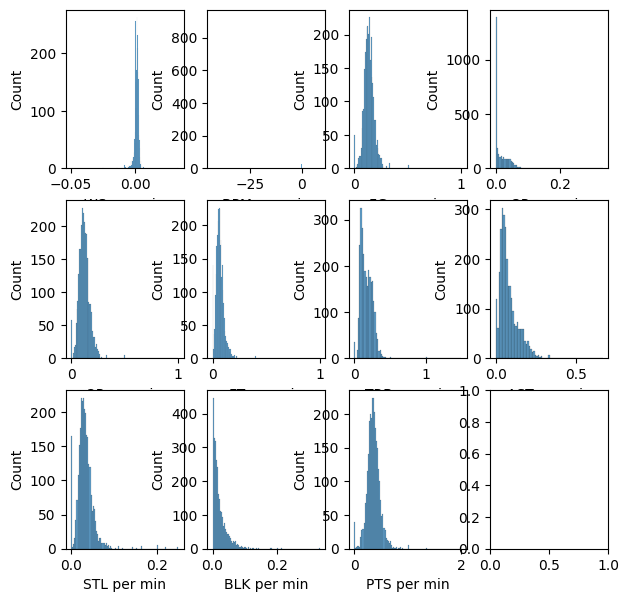

In [714]:
fig, axes = plt.subplots(3, 4, figsize=(7, 7))
for i, ax in enumerate(fig.axes):
    if i < 11:
        #ax.tick_params(axis='x', rotation=45)
        sns.histplot(x=df_num.columns[i],alpha=0.7, data=df_num, ax=ax)

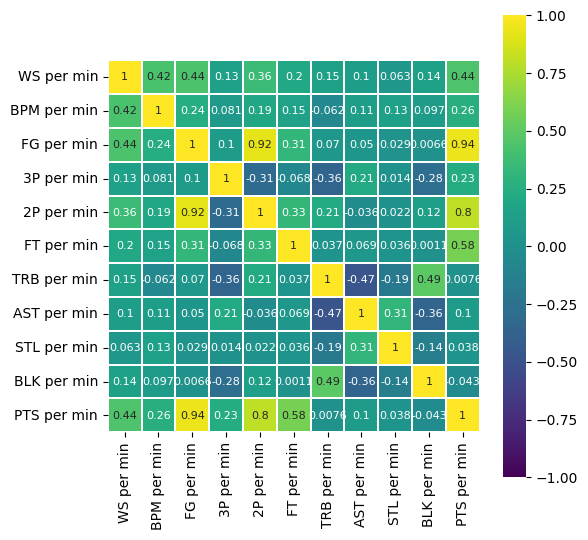

In [715]:
df_corr = df_num.corr()
plt.figure(figsize=(6,6))

sns.heatmap(df_corr,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [716]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df_pca = df.iloc[:, 13:]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)
pca = PCA()
pca_result = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_

In [717]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
max_pca = np.argmax(cumulative_explained_variance >= 0.8) + 1
max_pca

6

In [718]:
weights = pca.components_[:max_pca]
new_var = np.dot(scaled_data, weights.T)
df['PC'] = np.dot(new_var, np.ones((max_pca,1)))

In [719]:
df = df[['Player', 'PC']]
df.head(3)

,Player,PC
0,A.C. Green,-0.808599
1,A.J. Bramlett,-5.562924
2,A.J. English,1.711372


In [720]:
df['First Name'] = '' * len(df['Player'])
df['Last Name'] = '' * len(df['Player'])
for i in range(len(df['Player'])):
    df.loc[i,'First Name'] = sorted(df['Player'][i].split(' '))[0]
    df.loc[i,'Last Name'] = sorted(df['Player'][i].split(' '))[-1]
#df3[['First Name', 'Last Name']].tail(3)
df.tail(3)

<ipython-input-720-71fa5e0caf6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['First Name'] = '' * len(df['Player'])
<ipython-input-720-71fa5e0caf6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last Name'] = '' * len(df['Player'])


,Player,PC,First Name,Last Name
2830,Zoran Dragic,1.551576,Dragic,Zoran
2831,Zoran Planinic,1.206959,Planinic,Zoran
2832,Zydrunas Ilgauskas,0.595730,Ilgauskas,Zydrunas


In [721]:
df2 = pd.read_csv('NBA_Draft_1980_2017.tsv', sep='\t')
df2.head(3)

,year,round,pick,player,position,school
0,1980,1,1.0,"Carroll, Joe Barry",F/C,Purdue
1,1980,1,2.0,"Griffith, Darrell",G,Louisville
2,1980,1,3.0,"McHale, Kevin",F/C,Minnesota


In [722]:
df2['First Name'] = '' * len(df2['player'])
df2['Last Name'] = '' * len(df2['player'])
for i in range(len(df2['player'])):
    if ',' in df2['player'][i]:
        df2.loc[i, 'First Name'] = sorted(df2['player'][i].split(', '))[0]
        df2.loc[i, 'Last Name'] = sorted(df2['player'][i].split(', '))[-1]
    else:
        df2.loc[i,'First Name'] = sorted(df2['player'][i].split(' '))[0]
        df2.loc[i,'Last Name'] = sorted(df2['player'][i].split(' '))[-1]
#df4.loc[:, ['First Name', 'Last Name', 'year', 'pick']]
df2

,year,round,pick,player,position,school,First Name,Last Name
0,1980,1,1.0,"Carroll, Joe Barry",F/C,Purdue,Carroll,Joe Barry
1,1980,1,2.0,"Griffith, Darrell",G,Louisville,Darrell,Griffith
2,1980,1,3.0,"McHale, Kevin",F/C,Minnesota,Kevin,McHale
3,1980,1,4.0,"Ransey, Kelvin",G,Ohio State,Kelvin,Ransey
4,1980,1,5.0,"Ray, James",F,Jacksonville,James,Ray
...,...,...,...,...,...,...,...,...
2162,2018,2,56.0,Jacob Evans,SF,Cincinnati,Evans,Jacob
2163,2018,2,57.0,Jevon Carter,PG,West Virginia,Carter,Jevon
2164,2018,2,58.0,Borisa Simanic,SF/PF,Serbia,Borisa,Simanic
2165,2018,2,59.0,Bonzie Colson,SF/PF,Notre Dame,Bonzie,Colson


In [723]:
# Out of curiosity, we wanted to look at KING James's stat, which in coindence led to the finding that some of the
# names are messier than we think. There are comas in front of some of the names, which requires us to do extra
# processes of data cleaning.
df2.iloc[1209, :]

year                             2003
round                               1
pick                              1.0
player                 , LeBron James
position                           SF
school        St. Vincent–St. Mary HS
First Name                           
Last Name                LeBron James
Name: 1209, dtype: object

In [724]:
df2.loc[1209,'First Name'] = 'James'
df2.loc[1209,'Last Name'] = 'Lebron'
df2[df2['year']==2003].head(1)

,year,round,pick,player,position,school,First Name,Last Name
1209,2003,1,1.0,", LeBron James",SF,St. Vincent–St. Mary HS,James,Lebron


In [725]:
df2[df2['First Name'] == '']
df2.loc[1157, 'First Name'] = 'Hilario'
df2.loc[1157, 'Last Name'] = 'Nene'
df2[df2['Last Name'] == 'Nene']

,year,round,pick,player,position,school,First Name,Last Name
1157,2002,1,7.0,", Nenê",C/PF,Vasco da Gama,Hilario,Nene


In [726]:
import re
count_first = 0
for name in df2['First Name']:
    if re.search('\w+', name):
        continue
    else:
        count_first += 1
print(count_first)

0


In [727]:
count_last = 0
for name in df2['Last Name']:
    if re.search('\w+', name):
        continue
    else:
        count_last += 1
print(count_last)

0


In [728]:
df2.head(3)

,year,round,pick,player,position,school,First Name,Last Name
0,1980,1,1.0,"Carroll, Joe Barry",F/C,Purdue,Carroll,Joe Barry
1,1980,1,2.0,"Griffith, Darrell",G,Louisville,Darrell,Griffith
2,1980,1,3.0,"McHale, Kevin",F/C,Minnesota,Kevin,McHale


In [729]:
merged_pd = pd.merge(df,df2, on = ['First Name', 'Last Name'], how='inner')
merged_pd = merged_pd[['First Name', 'Last Name', 'pick', 'PC']]

In [730]:
merged_pd.head(5)

,First Name,Last Name,pick,PC
0,A.J.,English,37.0,1.711372
1,A.J.,Guyton,32.0,2.072384
2,Aaron,Brooks,26.0,4.422132
3,Aaron,Gordon,4.0,0.827349
4,Aaron,Gray,49.0,-3.079643


In [731]:
perc_25 = np.percentile(merged_pd['PC'], 25)
perc_50 = np.percentile(merged_pd['PC'], 50)
perc_75 = np.percentile(merged_pd['PC'], 75)

for i in range(len(merged_pd['PC'])):
  if merged_pd.loc[i, 'PC'] <= perc_25:
    merged_pd.loc[i, 'percentile'] = 1
  elif merged_pd.loc[i, 'PC'] > perc_25 and merged_pd.loc[i,'PC'] <= perc_50:
    merged_pd.loc[i, 'percentile'] = 2
  elif merged_pd.loc[i, 'PC'] > perc_50 and merged_pd.loc[i, 'PC'] <= perc_75:
    merged_pd.loc[i, 'percentile'] = 3
  else:
    merged_pd.loc[i, 'percentile'] = 4

In [732]:
merged_pd

,First Name,Last Name,pick,PC,percentile
0,A.J.,English,37.0,1.711372,3.0
1,A.J.,Guyton,32.0,2.072384,4.0
2,Aaron,Brooks,26.0,4.422132,4.0
3,Aaron,Gordon,4.0,0.827349,3.0
4,Aaron,Gray,49.0,-3.079643,1.0
...,...,...,...,...,...
1562,Dare,Yinka,14.0,-4.142716,1.0
1563,Joseph,Yvon,36.0,10.361015,4.0
1564,LaVine,Zach,13.0,4.100256,4.0
1565,Randolph,Zach,19.0,2.452666,4.0


<Axes: xlabel='pick', ylabel='PC'>

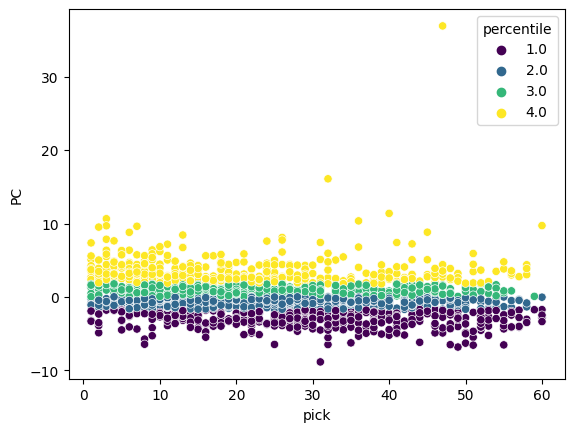

In [733]:
sns.scatterplot(x='pick', y='PC', hue='percentile', data=merged_pd, palette='viridis')

In [734]:
# Baseline Model - Regression Model
from sklearn.linear_model import LinearRegression
X = merged_pd['pick']
y = merged_pd['PC']
reg = LinearRegression().fit(X.to_numpy().reshape(-1,1), y)
reg.score(X.to_numpy().reshape(-1,1),y)

0.04778875334990351

In [735]:
reg.coef_, reg.intercept_

(array([-0.04049991]), 1.2033096665420269)

In [736]:
# K Means Clusters
df_kmeans = merged_pd[['pick', 'PC']]

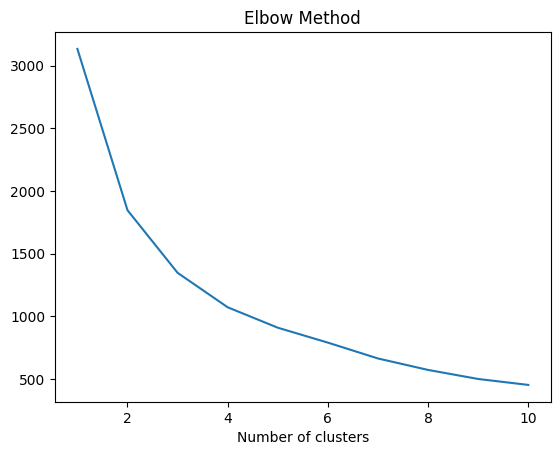

In [748]:
# Elbow Method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans)
score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    score.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.show()
# It looks like k = 4 may be the best based on the elbow method

In [738]:
# Silhouetter Method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7,8,9,10]
for n in n_clusters:
  clusterer = KMeans(n_clusters=n, n_init="auto", random_state=10)
  cluster_labels = clusterer.fit_predict(df_kmeans.to_numpy())
  silhouette_avg = silhouette_score(df_kmeans.to_numpy(), cluster_labels)
  print('When k = ', n,  'the silhouette average is ', silhouette_avg)

# k = 2 gives us the maximum silhouette score

When k =  2 the silhouette average is  0.5845745363664284
When k =  3 the silhouette average is  0.5152223330195972
When k =  4 the silhouette average is  0.4814858054606308
When k =  5 the silhouette average is  0.43598735509179987
When k =  6 the silhouette average is  0.4110722177891502
When k =  7 the silhouette average is  0.3841321468944971
When k =  8 the silhouette average is  0.37114786380119325
When k =  9 the silhouette average is  0.3488275379221154
When k =  10 the silhouette average is  0.34047965106881833


In [739]:
kmeans_2 = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_2.fit(X_scaled)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [742]:
kmeans_2.labels_

array([0, 0, 1, ..., 1, 1, 0], dtype=int32)

Text(0, 0.5, 'Stats')

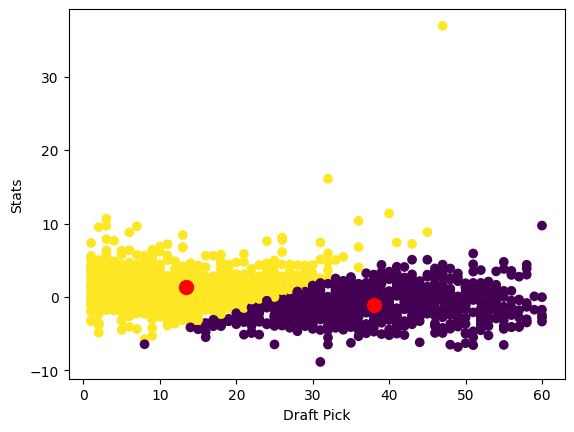

In [744]:
# k = 2
merged_pd['cluster2'] = kmeans_2.labels_
plt.scatter(merged_pd['pick'], merged_pd['PC'], c=merged_pd['cluster2'], cmap='viridis')
plt.scatter(scaler.inverse_transform(kmeans_2.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans_2.cluster_centers_)[:, 1], s=100, c='red')
plt.xlabel('Draft Pick')
plt.ylabel('Stats')

Text(0, 0.5, 'Stats')

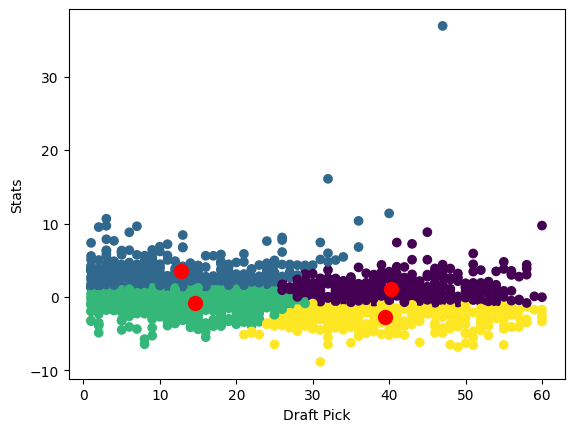

In [745]:
# k = 4
kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_4.fit(X_scaled)
merged_pd['cluster4'] = kmeans_4.labels_
plt.scatter(merged_pd['pick'], merged_pd['PC'], c=merged_pd['cluster4'], cmap='viridis')
plt.scatter(scaler.inverse_transform(kmeans_4.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans_4.cluster_centers_)[:, 1], s=100, c='red')
plt.xlabel('Draft Pick')
plt.ylabel('Stats')